In [38]:
#import the package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model 

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

# Importing classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import linear_model 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# Importing required packages for visualization
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#- import class imbalanced packages
from imblearn import over_sampling 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification


# Importing XGBoost library
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
dfTrace = pd.read_csv('/Users/rparama/Downloads/Dataset/EtherClusterV2.csv')
dfTrace.head()

,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,...,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address,KClusterID,HCluster_id
0,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
1,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
2,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
3,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0
4,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0


# Splitting the data into train & test data

In [3]:
# Putting feature variable to X
X= dfTrace[['receipt_status', 
            'Contract_is_erc20',
            'trace_from_address', 
            'trace_to_address', 
            'trace_value', 
            'trace_gas',
            'trace_gas_used', 
            'token_transfer_from_address',
            'token_transfer_to_address', 
            'token_transfer_value',
            'transaction_from_address', 
            'transaction_to_address',
            'transaction_value', 
            'transaction_gas', 
            'transaction_gas_price',
            'receipt_cumulative_gas_used', 
            'receipt_gas_used', 
            'token_decimals',
            'token_total_supply', 
            'Contract_address']]

# Putting response variable to y
y= dfTrace['KClusterID']#class variable

In [4]:
#Code used to split the data set into data set Train and data set test of 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))
print("\n")
print("X train Shape ({0},{1})".format(X_train.shape[0], X_train.shape[1]))
print("y train Shape ({0},1)".format(y_train.shape[0]))
print("\n")
print("X test Shape ({0},{1})".format(X_test.shape[0], X_test.shape[1]))
print("y test Shape ({0},1)".format(y_test.shape[0]))

Number transactions train dataset:  63
Number transactions test dataset:  16
Total number of transactions:  79


X train Shape (63,20)
y train Shape (63,1)


X test Shape (16,20)
y test Shape (16,1)


### Preserve X_test & y_test to evaluate on the test data once model is build

In [5]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

102
85
17


# SMOTE

In [43]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

# Decision Tree

In [418]:
# Importing decision tree classifier from sklearn library

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 99)

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [419]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.85      0.92      0.88        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.69        16
   macro avg       0.21      0.23      0.22        16
weighted avg       0.63      0.69      0.66        16



In [420]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  2  0  0]]
0.6875


In [421]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

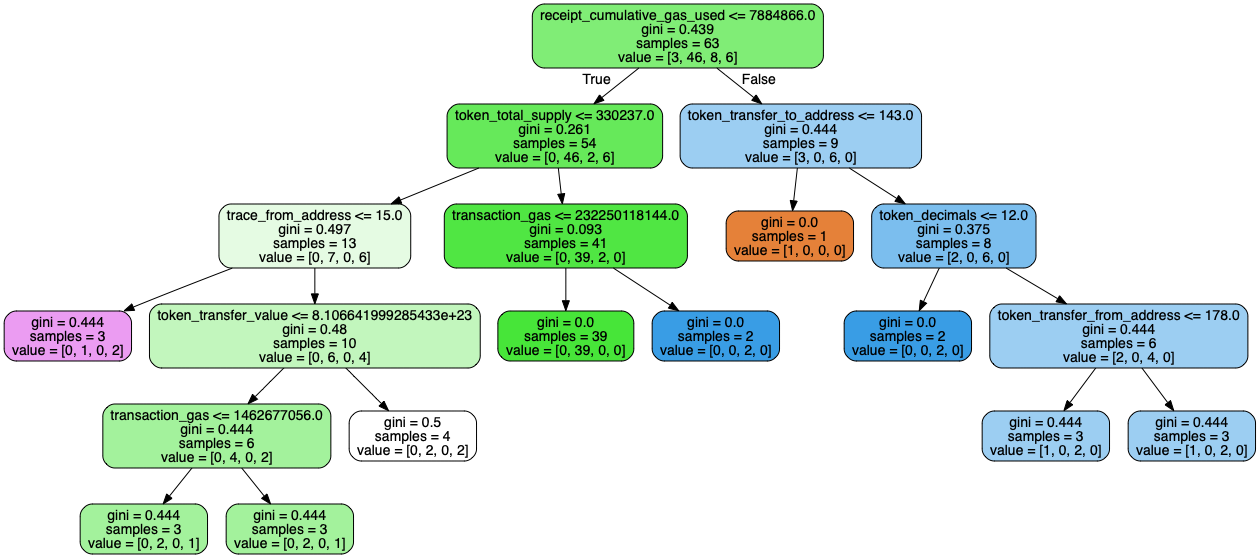

In [422]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [423]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 30)}, return_train_score=True,
             scoring='accuracy')

In [424]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002974,0.000731,0.001861,0.000101,1,{'max_depth': 1},0.769231,0.846154,0.692308,0.833333,...,0.794872,0.057906,1,0.84,0.82,0.86,0.823529,0.823529,0.833412,0.015004
1,0.002444,0.000139,0.001735,0.000131,2,{'max_depth': 2},0.769231,0.769231,0.692308,0.833333,...,0.779487,0.052172,3,0.84,0.86,0.88,0.882353,0.843137,0.861098,0.017765
2,0.002661,0.000295,0.001843,0.000202,3,{'max_depth': 3},0.692308,0.769231,0.692308,0.833333,...,0.780769,0.086041,2,0.88,0.90,0.88,0.882353,0.862745,0.881020,0.011816
3,0.002535,0.000169,0.001699,0.000030,4,{'max_depth': 4},0.692308,0.692308,0.692308,0.833333,...,0.715385,0.059805,14,0.90,0.92,0.88,0.901961,0.882353,0.896863,0.014602
4,0.002547,0.000236,0.001786,0.000157,5,{'max_depth': 5},0.692308,0.769231,0.692308,0.833333,...,0.730769,0.061752,5,0.90,0.92,0.88,0.901961,0.882353,0.896863,0.014602


In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()